# use of callbacks , saving the data , and loading the saved data


In [1]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import seaborn as sns

In [2]:
#loading mnist dataset using keras
mnist = tf.keras.datasets.mnist

In [3]:
#since mnist dataset already contains training and testing datasets so we will load them
(x_train_full,y_train_full),(x_test, y_test) = mnist.load_data()

In [4]:
#scaling the data
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [5]:
#above we have scaled the train data
#now we will scale the test data
x_test = x_test/255.0

<function matplotlib.pyplot.show(close=None, block=None)>

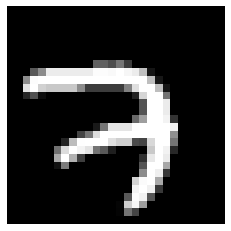

In [6]:
# now we will plot the first data point
plt.imshow(x_train[0], cmap="gray")
plt.axis("off")
plt.show

<AxesSubplot:>

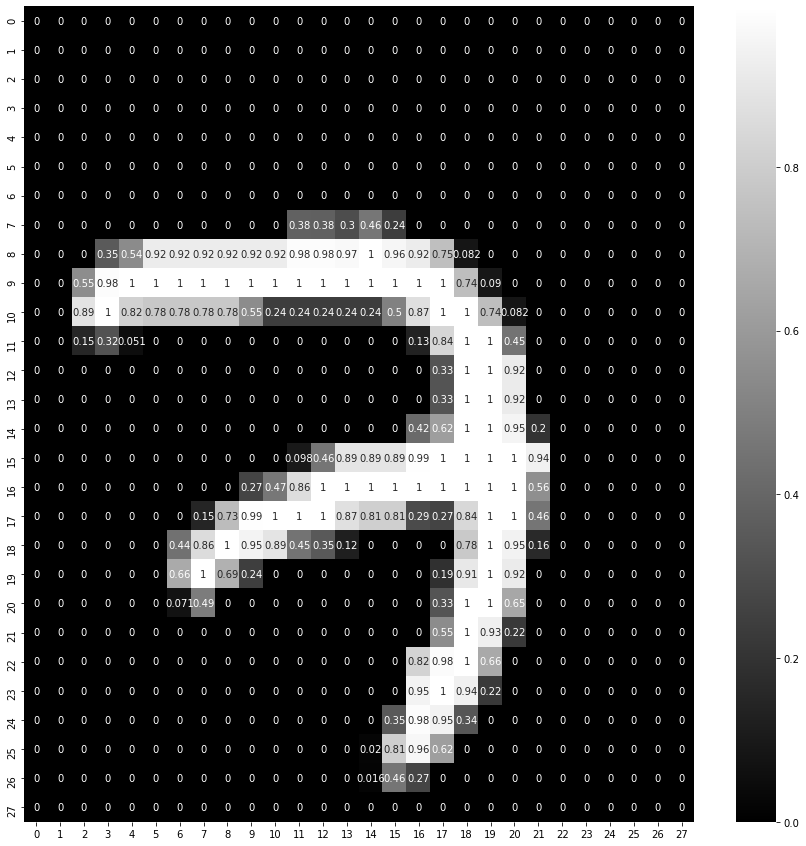

In [7]:
#lets draw the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], cmap="gray", annot=True)

In [8]:
#lets see the value of x_train and y_train
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
y_train[0]

7

# Creating sequential model

In [10]:
model = tf.keras.models.Sequential()

In [11]:
# adding the layers to model

In [12]:
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300, activation ='relu'))
model.add(tf.keras.layers.Dense(100, activation ='relu'))
model.add(tf.keras.layers.Dense(10, activation ='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
# now we will calculate loss
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER ='SGD'
METRICS =['accuracy']
model.compile(loss= LOSS_FUNCTION, optimizer=OPTIMIZER,metrics= METRICS)

# Tensorflow Callbacks

In [15]:
# using callbackse will create a log file to store our model and epochs

In [16]:
import time

In [17]:
def get_log_path(log_dir="logs/fit"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    log_path = os.path.join(log_dir,fileName)
    print(f"Savings log at : {log_path}")
    return log_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir = log_dir)


Savings log at : logs/fit\log_2021_05_26_00_32_21


# Early stopping callbacks

In [18]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)

# Model Checkpointing Callbacks



In [19]:
CKPT_path = "model.ckpt.h5"

In [20]:
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [21]:
EPOCHS =50
VALIDATION_SET = (x_valid, y_valid)
history = model.fit(x_train, y_train, epochs = EPOCHS, validation_data= VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb, checkpointing_cb])

Epoch 1/50
1719/1719 [==============================] - 13s 6ms/step - loss: 0.5904 - accuracy: 0.8481 - val_loss: 0.3062 - val_accuracy: 0.9120
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2889 - accuracy: 0.9182 - val_loss: 0.2400 - val_accuracy: 0.9320
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2364 - accuracy: 0.9327 - val_loss: 0.2017 - val_accuracy: 0.9432
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2017 - accuracy: 0.9427 - val_loss: 0.1767 - val_accuracy: 0.9508
Epoch 5/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1762 - accuracy: 0.9501 - val_loss: 0.1589 - val_accuracy: 0.9564
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1563 - accuracy: 0.9559 - val_loss: 0.1432 - val_accuracy: 0.9596
Epoch 7/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1400 - accuracy: 0.9600 - val_loss: 0.1353 - val_accuracy

In [22]:
# now we will save this model
import time
import os

def savedModel_path(model_dir = "Trained_Model"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S.h5")
    model_path = os.path.join(model_dir , fileName)
    print(f"model{fileName} will be saved at {model_path}")
    return model_path

In [23]:
UNIQUE_PATH = savedModel_path()
UNIQUE_PATH

modelModel_2021_05_26_00_37_59.h5 will be saved at Trained_Model\Model_2021_05_26_00_37_59.h5


'Trained_Model\\Model_2021_05_26_00_37_59.h5'

In [24]:
tf.keras.models.save_model(model, UNIQUE_PATH)

In [25]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.590443,0.848109,0.306199,0.9120
1,0.288939,0.918218,0.239963,0.9320
2,0.236384,0.932709,0.201746,0.9432
3,0.201664,0.942673,0.176658,0.9508
4,0.176173,0.950073,0.158860,0.9564
5,0.156331,0.955927,0.143189,0.9596
6,0.140043,0.960036,0.135266,0.9634
7,0.126458,0.964182,0.121164,0.9654
8,0.115062,0.968000,0.114420,0.9676
9,0.105130,0.970273,0.107647,0.9706


<AxesSubplot:>

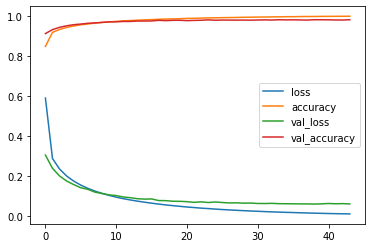

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9773: 0s - loss:


[0.06982364505529404, 0.9772999882698059]

In [28]:
x_new = x_test[:3]
y_prob = model.predict(x_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [29]:
y_pred = np.argmax(y_prob, axis =-1) # axis = -1 is to keep columns
y_pred

array([7, 2, 1], dtype=int64)

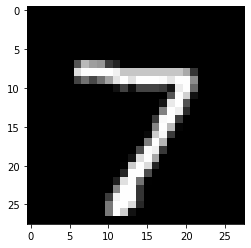

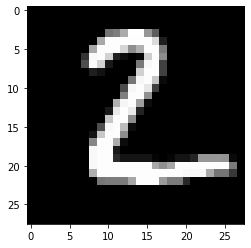

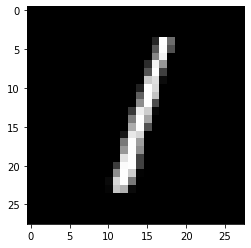

In [31]:
for data,pred,actual in zip(x_new,y_pred,y_prob):
    plt.imshow(data,cmap='gray')
    plt.show()